**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:***

---
(*In Title case, separated with commas*)
***Full names of all students in the team:***

---
(*Separated by commas*)
***Id number of all students in the team:***


# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [81]:
%pip install sdv
%pip uninstall urllib3 --y
%pip install urllib3==1.26.7
exit()

Note: you may need to restart the kernel to use updated packages.
Found existing installation: urllib3 1.26.7
Uninstalling urllib3-1.26.7:
  Successfully uninstalled urllib3-1.26.7
Note: you may need to restart the kernel to use updated packages.
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sdv.lite import SingleTablePreset
from sdv.metadata import SingleTableMetadata
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import random

In [3]:
real_data=pd.read_excel("diabetes2.xlsx")

In [4]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

In [5]:
Synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

In [6]:
Synthesizer.fit(
    data=real_data
)

In [7]:
Synthetic_data = Synthesizer.sample(
    num_rows=10000
)

In [8]:
Synthetic_data.to_csv("Generated_data")


In [9]:
Synthetic_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,151,78,10,65,36.280343,0.664665,45,1
1,4,104,101,24,29,37.394831,0.078000,27,0
2,3,109,93,36,265,21.725647,0.348009,31,1
3,5,86,47,12,108,25.372657,0.763315,22,1
4,1,101,26,32,68,32.259080,0.325648,29,0
...,...,...,...,...,...,...,...,...,...
9995,2,114,68,25,79,30.544980,0.078000,25,0
9996,4,102,57,2,0,27.788010,0.487014,38,0
9997,1,144,82,33,143,30.672180,0.399084,34,1
9998,12,181,78,14,76,46.479313,0.800673,49,1


# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***


In [10]:
df = pd.read_csv("Generated_data")
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,4,151,78,10,65,36.280343,0.664665,45,1
1,1,4,104,101,24,29,37.394831,0.078000,27,0
2,2,3,109,93,36,265,21.725647,0.348009,31,1
3,3,5,86,47,12,108,25.372657,0.763315,22,1
4,4,1,101,26,32,68,32.259080,0.325648,29,0


In [11]:
df.shape

(10000, 10)

In [12]:
df.dtypes

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10000 non-null  int64  
 1   Pregnancies               10000 non-null  int64  
 2   Glucose                   10000 non-null  int64  
 3   BloodPressure             10000 non-null  int64  
 4   SkinThickness             10000 non-null  int64  
 5   Insulin                   10000 non-null  int64  
 6   BMI                       10000 non-null  float64
 7   DiabetesPedigreeFunction  10000 non-null  float64
 8   Age                       10000 non-null  int64  
 9   Outcome                   10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [14]:
df = df.sample(frac=1, random_state=42)
df = df.reset_index(drop=True)

In [15]:
split_ratio = 0.8

total_rows = len(df)
train_rows = int(split_ratio * total_rows)
test_rows = total_rows - train_rows

train_data = df.iloc[:train_rows, :]
test_data = df.iloc[train_rows:, :]


In [16]:
train_data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6252,0,49,16,3,111,12.706915,0.408102,24,0
1,4684,6,151,91,1,63,42.754504,0.078000,29,1
2,1731,4,104,65,49,201,36.673367,0.492843,21,0
3,4742,3,115,60,24,28,32.738281,0.557827,21,0
4,4521,0,125,64,17,197,31.723835,0.753576,21,1
...,...,...,...,...,...,...,...,...,...,...
7995,1638,6,132,86,38,214,33.294262,0.297307,23,0
7996,5891,7,151,70,20,47,32.835121,0.105262,44,0
7997,7427,6,162,81,33,97,43.938719,0.476641,42,1
7998,608,2,158,56,15,204,33.463881,0.416570,32,0


In [17]:
test_data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8000,399,4,99,72,7,109,28.907563,0.311843,32,0
8001,7247,7,144,64,8,108,25.898019,0.176388,31,0
8002,6406,0,118,87,58,257,44.880034,0.806956,25,1
8003,882,7,71,50,7,0,37.581558,0.508558,43,0
8004,3565,1,76,56,28,168,44.582454,0.587076,31,0
...,...,...,...,...,...,...,...,...,...,...
9995,5734,9,107,69,2,0,31.664243,0.078000,37,0
9996,5191,0,178,62,7,192,24.812998,0.575453,21,0
9997,5390,6,92,57,9,0,31.355760,0.592447,27,0
9998,860,11,158,99,16,31,27.478041,0.268134,59,0


In [18]:
train_data.shape, test_data.shape

((8000, 10), (2000, 10))

In [19]:
X_train = train_data.drop(['Outcome'], axis=1)
y_train = train_data['Outcome']
X_test = test_data.drop(['Outcome'], axis=1)
y_test = test_data['Outcome']

In [20]:
X_train.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6252,0,49,16,3,111,12.706915,0.408102,24
1,4684,6,151,91,1,63,42.754504,0.078000,29
2,1731,4,104,65,49,201,36.673367,0.492843,21
3,4742,3,115,60,24,28,32.738281,0.557827,21
4,4521,0,125,64,17,197,31.723835,0.753576,21


In [21]:
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
X_test.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8000,399,4,99,72,7,109,28.907563,0.311843,32
8001,7247,7,144,64,8,108,25.898019,0.176388,31
8002,6406,0,118,87,58,257,44.880034,0.806956,25
8003,882,7,71,50,7,0,37.581558,0.508558,43
8004,3565,1,76,56,28,168,44.582454,0.587076,31


In [23]:
y_test.head()

8000    0
8001    0
8002    1
8003    0
8004    0
Name: Outcome, dtype: int64

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [30]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X.head(),y.head()

(   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
 0        6252            0       49             16              3      111   
 1        4684            6      151             91              1       63   
 2        1731            4      104             65             49      201   
 3        4742            3      115             60             24       28   
 4        4521            0      125             64             17      197   
 
          BMI  DiabetesPedigreeFunction  Age  
 0  12.706915                  0.408102   24  
 1  42.754504                  0.078000   29  
 2  36.673367                  0.492843   21  
 3  32.738281                  0.557827   21  
 4  31.723835                  0.753576   21  ,
 0    0
 1    1
 2    0
 3    0
 4    1
 Name: Outcome, dtype: int64)

In [31]:
Synthetic_data = pd.read_csv(r"Generated_data")


X1=Synthetic_data.iloc[:,1:9]
for i in X1.columns:
    X1[i]=(X1[i]-X1[i].mean())/X1[i].std()
X1.insert(0, 'Ones', 1)

X=X1.iloc[0:800,:]
Y=Synthetic_data.iloc[0:800:,9:10]

x_t=X1.iloc[800:,:]
y_t=Synthetic_data.iloc[800:,9:10]

[ 0.60359104  0.39217167 -0.35452159 -0.03796945 -0.24796611  0.49044578
  0.11945759  0.13613104  0.36044173]
0.5414130434782609


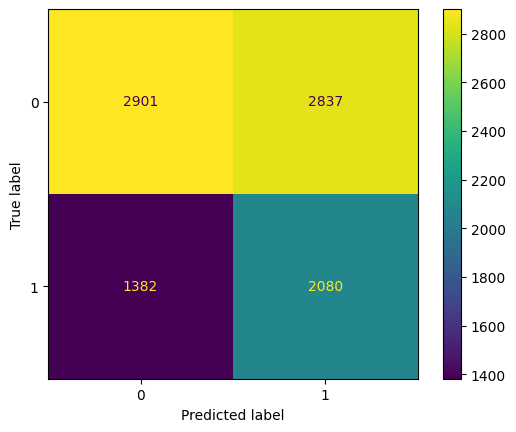

In [33]:
def Stochastic_gradient_descent(x,y, alpha, iterations):

    costIteration = []  # For storing the cost function at each iteration
    theta = np.ones((1,x.shape[1]))# Initializing thetas with 0s

    m = y.size


    for i in range(iterations):
      index=np.random.randint(0,x.shape[1]-1)
      x_sample=x.loc[index,:]
      y_sample=y.loc[index,:]
      h = x_sample.dot(theta.T)
      diff=h-y_sample.values
      theta = theta - alpha*(diff[0]*x_sample.values)
    return theta


j=0.01
k=1000
theta=Stochastic_gradient_descent(X, Y, alpha=j, iterations=k)[0]
print(theta)
prediction_t=[]
for i in x_t.index:
    prediction=round(np.clip(x_t.loc[i,:].dot(theta),0,1))
    prediction_t.append(prediction)

ConfusionMatrixDisplay(confusion_matrix(y_t,prediction_t)).plot()
print(accuracy_score(y_t,prediction_t))

## **_Batch Gradient Descent_**

0.7031521739130435


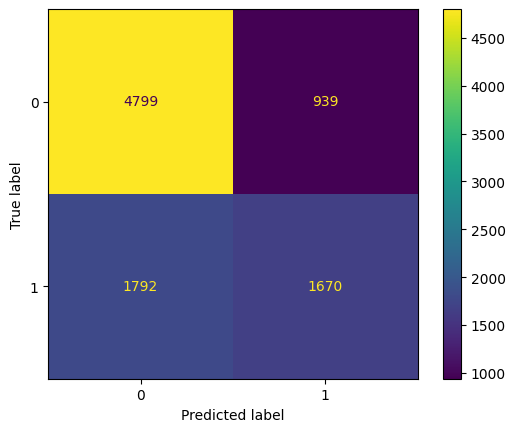

In [34]:
def gradient_descent(x,y, alpha, iterations):

    costIteration = []  # For storing the cost function at each iteration
    theta = np.zeros((1,x.shape[1]))# Initializing thetas with 0s

    m = y.size

    for i in range(iterations):
        h = x.dot(theta.T)
        theta = theta - alpha*(1/m)*(np.dot(x.T, h-y.values))[:,0]
    return theta


j=0.1
k=120
theta=gradient_descent(X, Y, alpha=j, iterations=k)[0]

prediction_t=[]
for i in x_t.index:
    prediction=round(np.clip(x_t.loc[i,:].dot(theta),0,1))
    prediction_t.append(prediction)

ConfusionMatrixDisplay(confusion_matrix(y_t,prediction_t)).plot()
print(accuracy_score(y_t,prediction_t))